In [1]:
import os

import duckdb
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import geopandas as gpd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import matplotlib.pyplot as plt

In [2]:
load_dotenv()
def load_data():
    DB_USER = os.getenv("POSTGRES_USER")
    DB_PASSWORD = os.getenv("POSTGRES_PASSWORD")
    DB_HOST = os.getenv("POSTGRES_HOST")
    DB_PORT = os.getenv("POSTGRES_PORT")
    DB_NAME = os.getenv("POSTGRES_DB")

    connection_str = f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}'
    engine = create_engine(connection_str)

    query_acidentes = """
    SELECT * FROM relational.acidentes
    """

    query_envolvidos = """
    SELECT * 
    FROM relational.envolvidos
    INNER JOIN relational.acidentes ON envolvidos.id_acidente = acidentes.id
    """

    df_acidentes = pd.read_sql(query_acidentes, con=engine)
    df_envolvidos = pd.read_sql(query_envolvidos, con=engine)
    return df_acidentes, df_envolvidos

df, df_envolvidos = load_data()

In [3]:
df.shape

(260479, 19)

In [4]:
df.head()

,id,data_completa,regiao,estado,municipio,br,km,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,delegacia,latitude,longitude
0,260031,2020-01-01 01:00:00,Norte,TO,GURUPI,BR-153,678.0,Animais na Pista,Atropelamento de Animal,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Simples,Reta,Rural,DEL02-TO,-11.774602,-49.107450
1,260036,2020-01-01 01:00:00,Sudeste,RJ,NOVA IGUACU,BR-116,178.0,Ingestão de Álcool,Atropelamento de Pedestre,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Urbano,DEL01-RJ,-22.752230,-43.437910
2,260037,2020-01-01 01:52:00,Sul,SC,SAO JOSE,BR-101,206.0,Ingestão de Álcool,Colisão lateral,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Simples,Reta,Urbano,DEL01-SC,-27.591935,-48.618246
3,260038,2020-01-01 01:15:00,Norte,RO,CACOAL,BR-364,236.0,Velocidade Incompatível,Tombamento,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Simples,Reta,Urbano,DEL02-RO,-11.446246,-61.437612
4,260039,2020-01-01 01:30:00,Sul,PR,REBOUCAS,BR-153,360.0,Ingestão de Álcool,Capotamento,Com Vítimas Feridas,Plena Noite,Crescente,Garoa/Chuvisco,Simples,Curva,Rural,DEL03-PR,-25.675038,-50.750898


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260479 entries, 0 to 260478
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      260479 non-null  int64         
 1   data_completa           260479 non-null  datetime64[ns]
 2   regiao                  260479 non-null  object        
 3   estado                  260479 non-null  object        
 4   municipio               260479 non-null  object        
 5   br                      260479 non-null  object        
 6   km                      260479 non-null  float64       
 7   causa_acidente          260479 non-null  object        
 8   tipo_acidente           260479 non-null  object        
 9   classificacao_acidente  260479 non-null  object        
 10  fase_dia                260479 non-null  object        
 11  sentido_via             260479 non-null  object        
 12  condicao_metereologica  260479

In [6]:
df.describe()

,id,data_completa,km,latitude,longitude
count,260479.000000,260479,260479.000000,260479.000000,260479.000000
mean,416878.685641,2022-01-14 02:35:30.317991424,260.120574,-18.878939,-46.616811
min,260031.000000,2020-01-01 00:05:00,-1.000000,-33.706076,-72.119380
25%,334596.000000,2021-01-09 21:00:00,78.000000,-25.267420,-50.336299
50%,410247.000000,2022-01-13 21:55:00,194.000000,-20.414229,-47.730022
75%,500827.500000,2023-01-15 21:47:30,408.000000,-12.786051,-42.547860
max,589495.000000,2023-12-31 23:45:00,1454.000000,4.476284,-34.793181
std,93087.224308,NaN,226.626516,7.753294,6.190512


In [7]:
df['mes'] = df['data_completa'].dt.month
df['ano'] = df['data_completa'].dt.year
df['dia_semana'] = df['data_completa'].dt.day_name()
df.loc[df['dia_semana'] == 'Sunday', 'dia_semana'] = 'Domingo'
df.loc[df['dia_semana'] == 'Monday', 'dia_semana'] = 'Segunda'
df.loc[df['dia_semana'] == 'Tuesday', 'dia_semana'] = 'Terça'
df.loc[df['dia_semana'] == 'Wednesday', 'dia_semana'] = 'Quarta'
df.loc[df['dia_semana'] == 'Thursday', 'dia_semana'] = 'Quinta'
df.loc[df['dia_semana'] == 'Friday', 'dia_semana'] = 'Sexta'
df.loc[df['dia_semana'] == 'Saturday', 'dia_semana'] = 'Sábado'

In [8]:
df['dia_semana'].value_counts()

dia_semana
Sábado     43580
Domingo    43488
Sexta      40276
Segunda    35235
Quinta     33614
Quarta     32602
Terça      31684
Name: count, dtype: int64

In [9]:
ordem_dias = ['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado']
contagem_dias = df['dia_semana'].value_counts().reindex(ordem_dias)

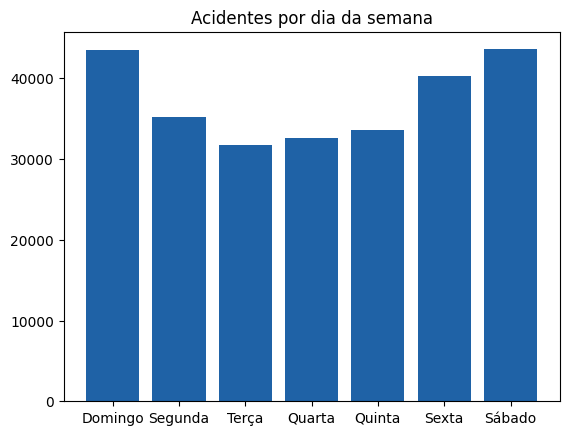

In [10]:
# Acidentes por dia da semana com matplotlib

plt.bar(ordem_dias, contagem_dias, color='#1f62a6')
plt.title('Acidentes por dia da semana')
plt.savefig('images/acidentes_por_dia_da_semana.png')
plt.show()

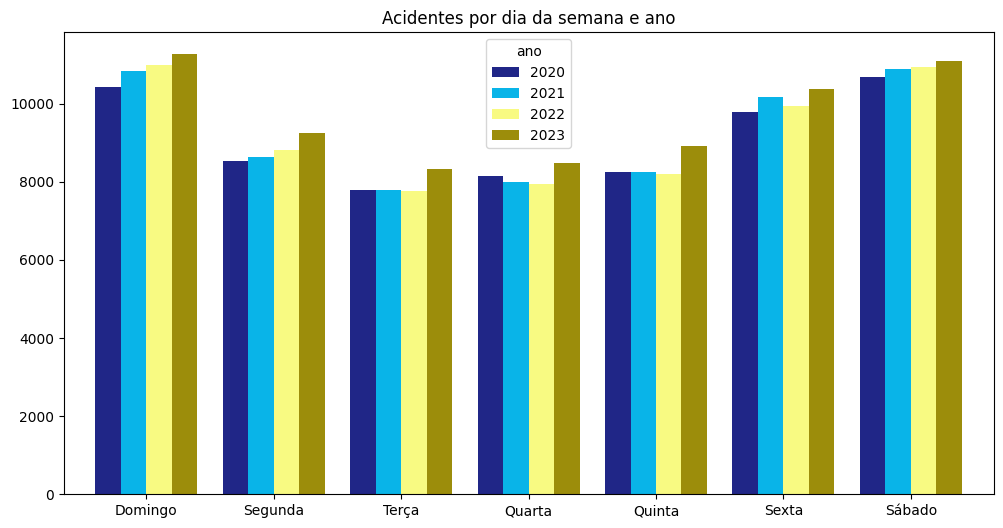

In [11]:
# Acidentes por dia da semana e ano com matplotlib

df_acidentes_ano = df.groupby(['ano', 'dia_semana']).size().reset_index(name='contagem')
df_acidentes_ano = df_acidentes_ano.pivot(index='dia_semana', columns='ano', values='contagem').reindex(ordem_dias)

df_acidentes_ano.plot(kind='bar', figsize=(12, 6), 
                      width=0.8,
                      color=['#202687', '#09b4e8', '#f8fa82', '#9c8d0b', '#9467bd', '#8c564b', '#e377c2'],
                      xlabel='')
plt.title('Acidentes por dia da semana e ano')
plt.tick_params(axis='x', rotation=0)
plt.savefig('images/acidentes_por_dia_da_semana_e_ano.png')
plt.show()

In [12]:
df.loc[df['mes'] == 1, 'mes'] = 'JAN'
df.loc[df['mes'] == 2, 'mes'] = 'FEV'
df.loc[df['mes'] == 3, 'mes'] = 'MAR'
df.loc[df['mes'] == 4, 'mes'] = 'ABR'
df.loc[df['mes'] == 5, 'mes'] = 'MAI'
df.loc[df['mes'] == 6, 'mes'] = 'JUN'
df.loc[df['mes'] == 7, 'mes'] = 'JUL'
df.loc[df['mes'] == 8, 'mes'] = 'AGO'
df.loc[df['mes'] == 9, 'mes'] = 'SET'
df.loc[df['mes'] == 10, 'mes'] = 'OUT'
df.loc[df['mes'] == 11, 'mes'] = 'NOV'
df.loc[df['mes'] == 12, 'mes'] = 'DEZ'

/tmp/ipykernel_1889/3897101187.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'JAN' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[df['mes'] == 1, 'mes'] = 'JAN'


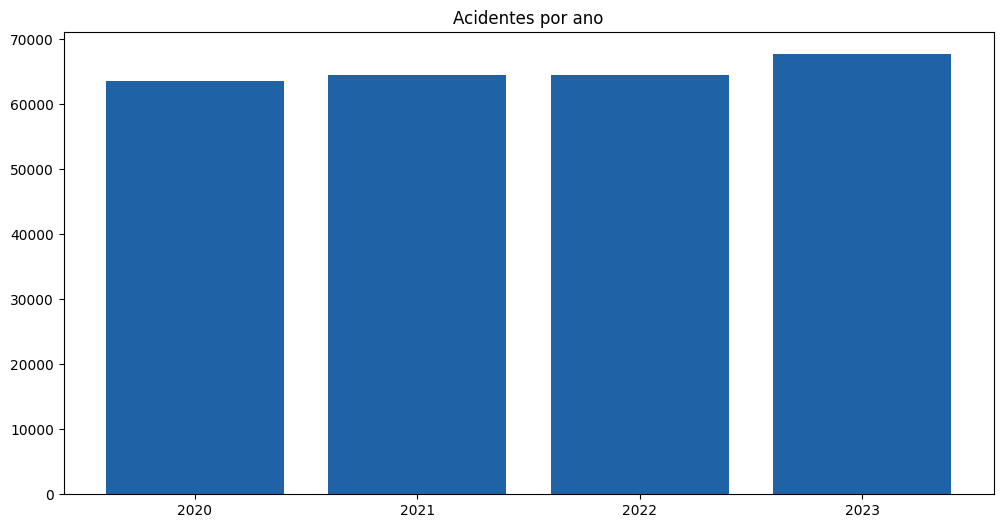

In [13]:
contagem_anos = df['ano'].value_counts().sort_index()

anos = contagem_anos.index.astype(str)
valores = contagem_anos.values

plt.figure(figsize=(12, 6))
plt.bar(anos, valores, color='#1f62a6')
plt.title('Acidentes por ano')
plt.savefig('images/acidentes_por_ano.png')
plt.show()

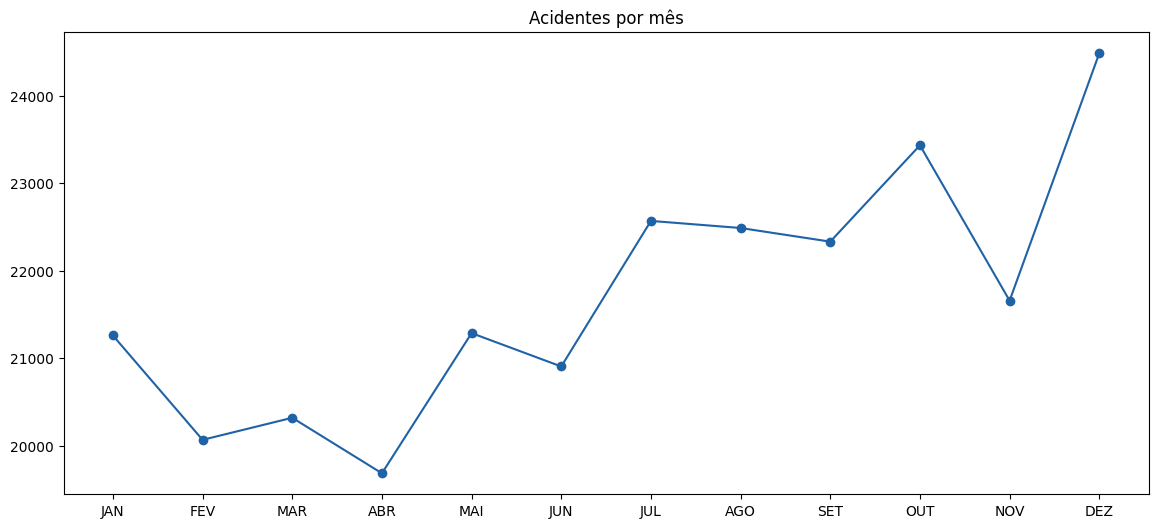

In [14]:
contagem = df['mes'].value_counts().sort_index()
# Ordenar os meses

ordem_meses = ['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT', 'NOV', 'DEZ']
contagem = contagem.reindex(ordem_meses)

plt.figure(figsize=(14, 6))
plt.plot(
    contagem.index,
    contagem.values,
    marker='o',
    color='#1f62a6'
)
plt.title('Acidentes por mês')
plt.savefig('images/acidentes_por_mes.png')
plt.show()

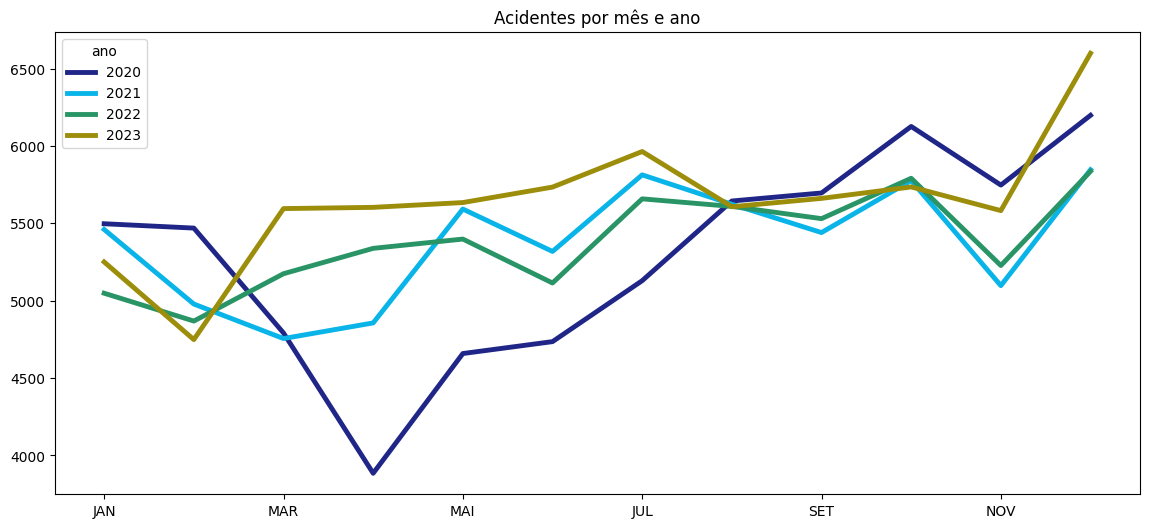

In [15]:
df_acidentes_ano = df.groupby(['ano', 'mes']).size().reset_index(name='contagem')
df_acidentes_ano = df_acidentes_ano.pivot(index='mes', columns='ano', values='contagem').reindex(ordem_meses)

df_acidentes_ano.plot(kind='line', figsize=(14, 6),
                      linewidth=3.5,
                        color=['#202687', '#09b4e8', '#299466', '#9c8d0b'],
                        xlabel='')
plt.title('Acidentes por mês e ano')
plt.savefig('images/acidentes_por_mes_e_ano.png')
plt.show()

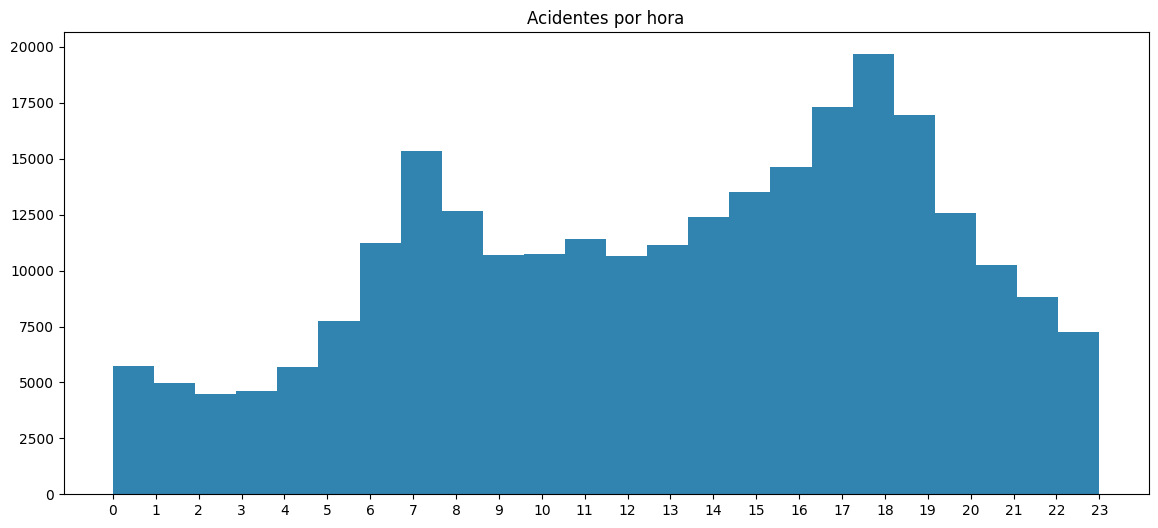

In [16]:
# Acidentes por hora

df['hora'] = df['data_completa'].dt.hour
contagem = df['hora'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
plt.hist(df['hora'], bins=24, color='#3183b0')
plt.title('Acidentes por hora')
plt.xticks(range(24), [f'{i}' for i in range(24)])
plt.savefig('images/acidentes_por_hora.png')
plt.show()

In [17]:
conn = duckdb.connect()
conn.register('df', df)
geojson = gpd.read_file("brazil_geo.json")

consulta_mapa = """
    SELECT
        estado AS estado,
        COUNT(DISTINCT id) AS num_accidents
        FROM df
        GROUP BY estado;
        """

con_accidents_per_state = conn.execute(consulta_mapa)
accidents_per_state = con_accidents_per_state.fetch_df()

merged_data = geojson.merge(accidents_per_state, how='left', left_on='id', right_on='estado')

mapabr = px.choropleth(
    merged_data,
    geojson=merged_data.set_geometry('geometry'),
    locations=merged_data.index,
    color='num_accidents',
    color_continuous_scale='Darkmint',
    labels={'num_accidents': 'Número de Acidentes'},
    hover_name='name',
    hover_data={'num_accidents': True},
)

mapabr.update_geos(fitbounds='locations', visible=False, projection_type='orthographic')
mapabr.to_html('mapa_acidentes_brasil.html')
mapabr.show(

SyntaxError: incomplete input (2245918963.py, line 31)

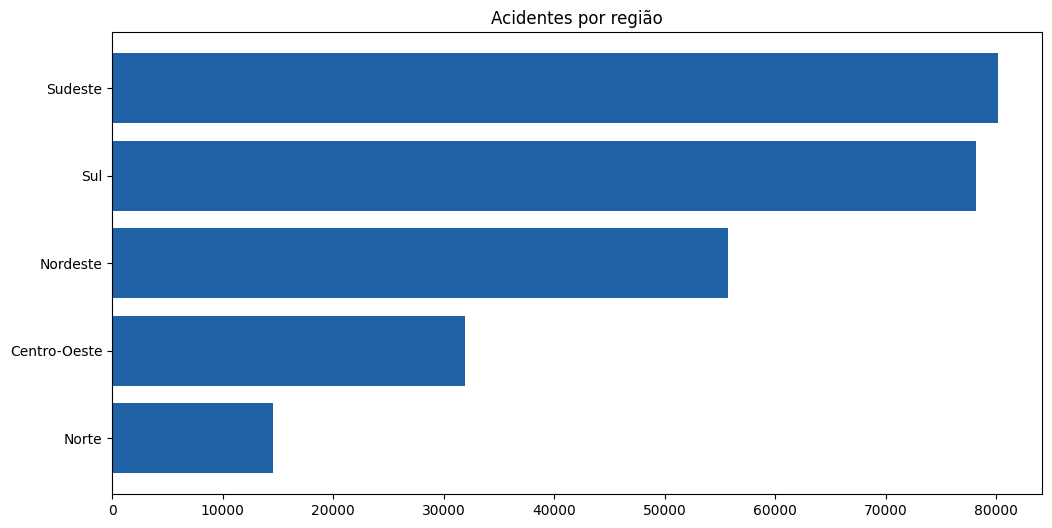

In [18]:
# Acidentes por região

regioes = df['regiao'].value_counts().index
contagem_regioes = df['regiao'].value_counts().values


plt.figure(figsize=(12, 6))
plt.barh(regioes, contagem_regioes, color='#1f62a6')
plt.title('Acidentes por região')
plt.gca().invert_yaxis()
plt.savefig('images/acidentes_por_regiao.png')
plt.show()

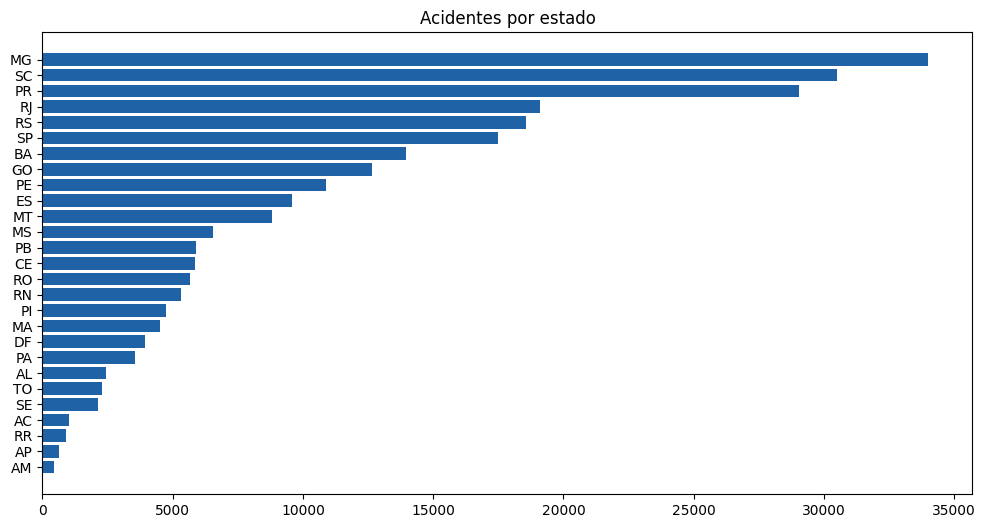

In [19]:
estados = df['estado'].value_counts().index
contagem_estados = df['estado'].value_counts().values

plt.figure(figsize=(12, 6))
plt.barh(estados, contagem_estados, color='#1f62a6')
plt.title('Acidentes por estado')
plt.gca().invert_yaxis()
plt.savefig('images/acidentes_por_estado.png')
plt.show()

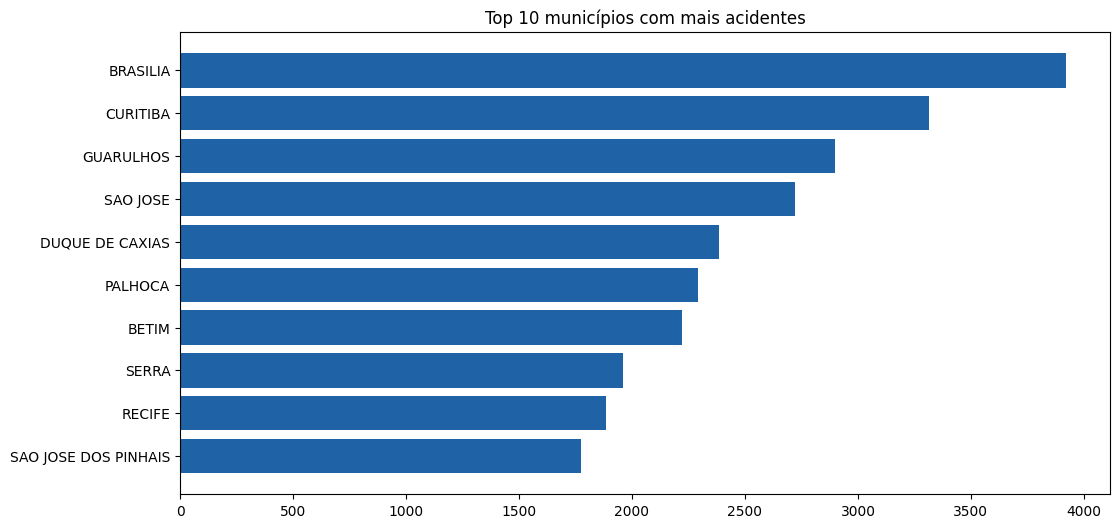

In [20]:
# top 10 municipios com mais acidentes

top_10_municipios = df['municipio'].value_counts().head(10).index
contagem_top_10_municipios = df['municipio'].value_counts().head(10).values


plt.figure(figsize=(12, 6))
plt.barh(top_10_municipios, contagem_top_10_municipios, color='#1f62a6')
plt.title('Top 10 municípios com mais acidentes')
plt.gca().invert_yaxis()
plt.savefig('images/top_10_municipios_com_mais_acidentes.png')
plt.show()

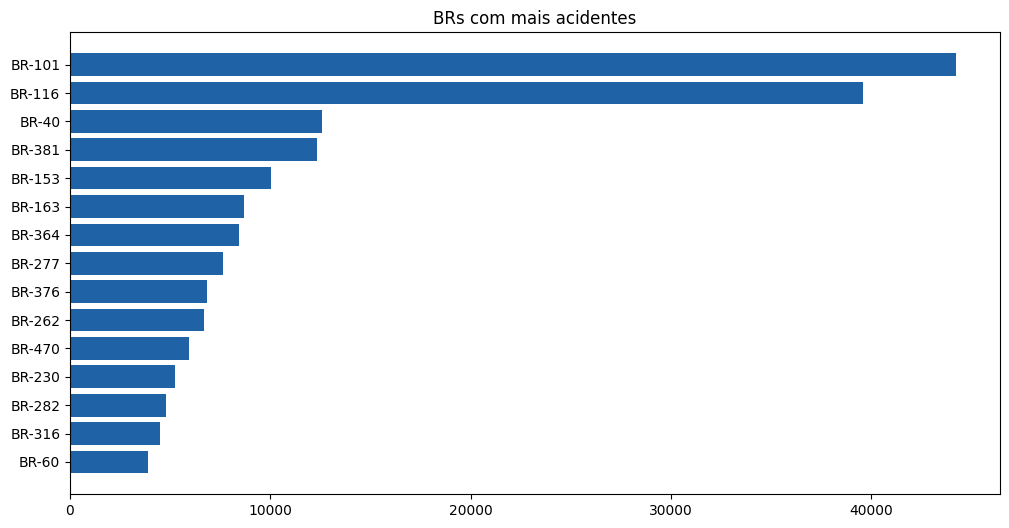

In [21]:
brs = df['br'].value_counts().head(15).index
contagem_brs = df['br'].value_counts().head(15).values

plt.figure(figsize=(12, 6))
plt.barh(brs, contagem_brs, color='#1f62a6')
plt.title('BRs com mais acidentes')
plt.gca().invert_yaxis()
plt.savefig('images/brs_com_mais_acidentes.png')
plt.show()

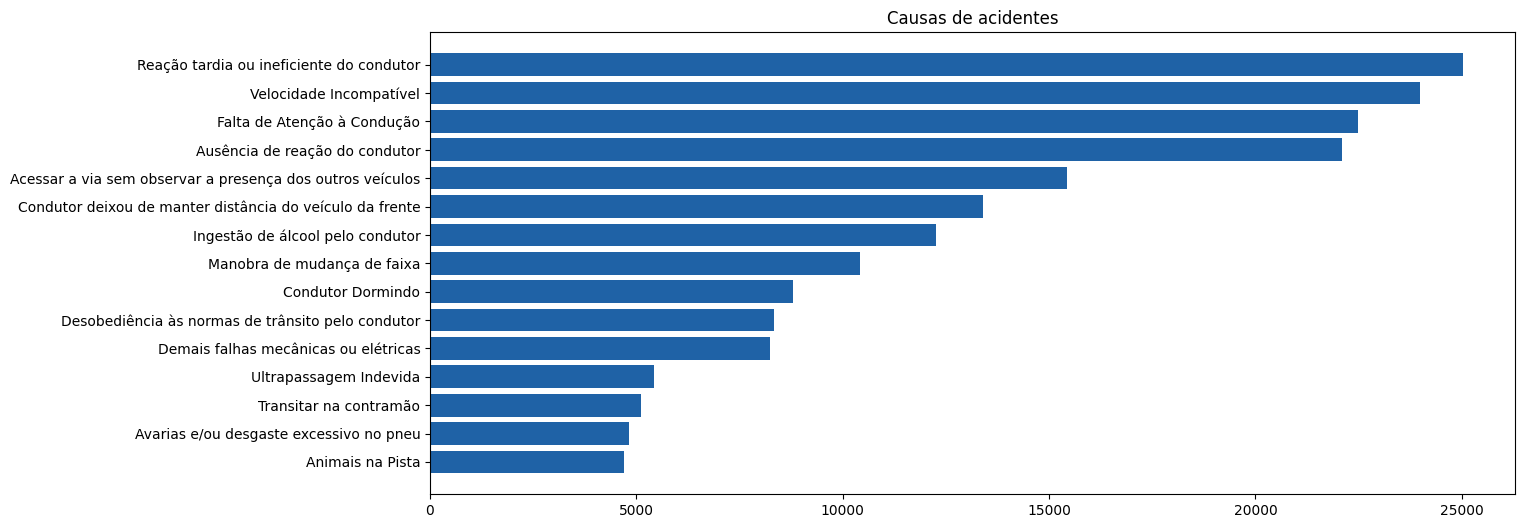

In [22]:
# Maiores causas de acidentes

causas_acidentes = df['causa_acidente'].value_counts().head(15).index
contagem_causas_acidentes = df['causa_acidente'].value_counts().head(15).values

plt.figure(figsize=(14, 6))
plt.barh(causas_acidentes, contagem_causas_acidentes, color='#1f62a6')
plt.title('Causas de acidentes')
plt.gca().invert_yaxis()
plt.savefig('images/causas_de_acidentes.png')
plt.show()

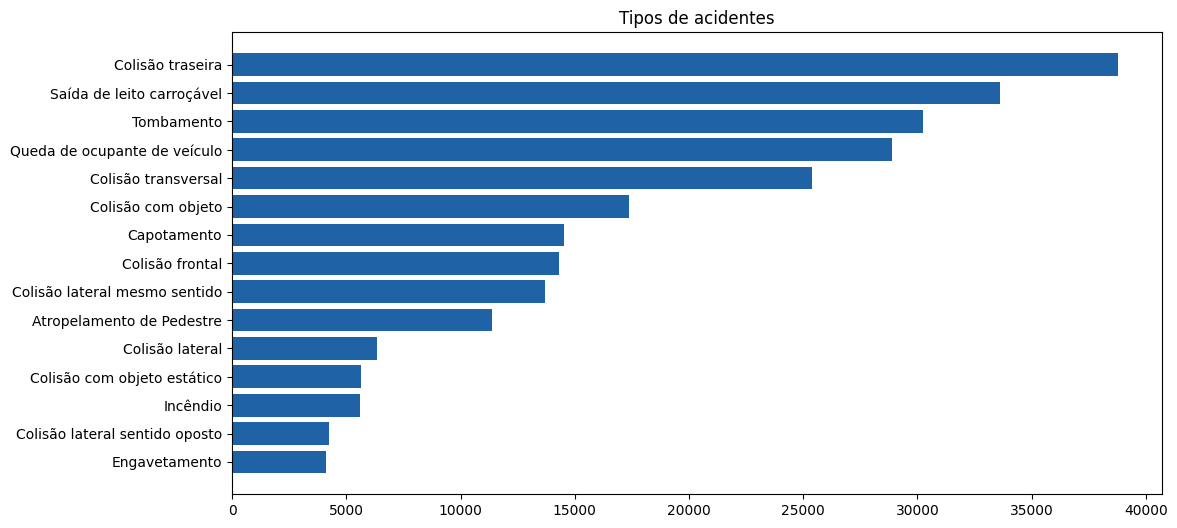

In [23]:
tipos_acidentes = df['tipo_acidente'].value_counts().head(15).index
contagem_tipos_acidentes = df['tipo_acidente'].value_counts().head(15).values

plt.figure(figsize=(12, 6))
plt.barh(tipos_acidentes, contagem_tipos_acidentes, color='#1f62a6')
plt.title('Tipos de acidentes')
plt.gca().invert_yaxis()
plt.show()

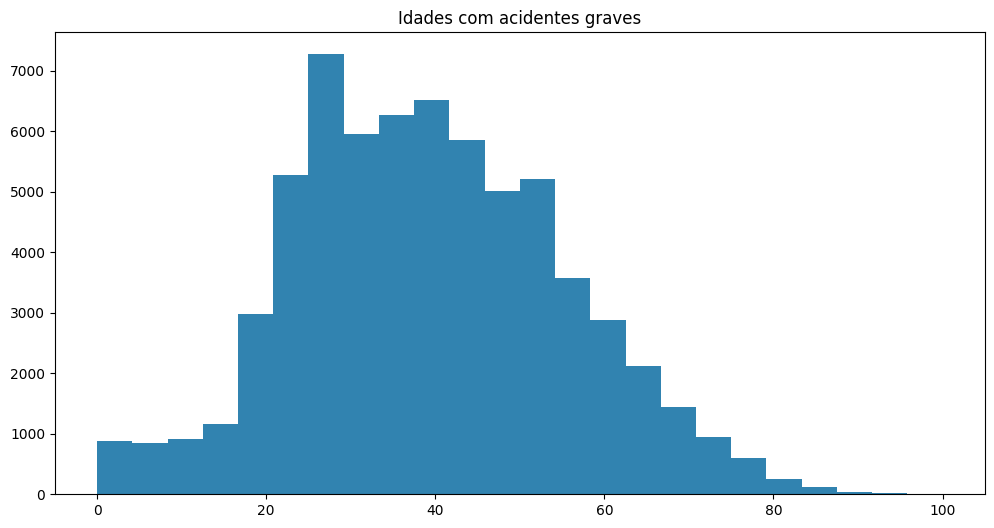

In [25]:
# Idades com acidentes graves

idades = df_envolvidos.loc[df_envolvidos['classificacao_acidente'] == 'Com Vítimas Fatais', 'idade']
plt.figure(figsize=(12, 6))
plt.hist(idades, bins=24, color='#3183b0')
plt.title('Idades com acidentes graves')
plt.savefig('images/idades_com_acidentes_graves.png')
plt.show()